In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io


In [3]:
iris_saved_npz = '/Users/souvikb/various_analysis/GaussSep/bose_codes/EIS_SDO_IRIS_data/IRIS_datasets/2017-07-29T23:49:52/\
iris_fit_results_2017-07-29T23-49-52.npz'

In [4]:
si_4_moments = np.load(iris_saved_npz)
si_4_moments.files

['net_flux',
 'net_flux_unit',
 'core_shift',
 'core_shift_unit',
 'sigma',
 'sigma_unit']

In [5]:
net_flux = si_4_moments['net_flux']
net_flux_unit = si_4_moments['net_flux_unit']

core_shift = si_4_moments['core_shift']
core_shift_unit = si_4_moments['core_shift_unit']

sigma = si_4_moments['sigma']
sigma_unit = si_4_moments['sigma_unit']


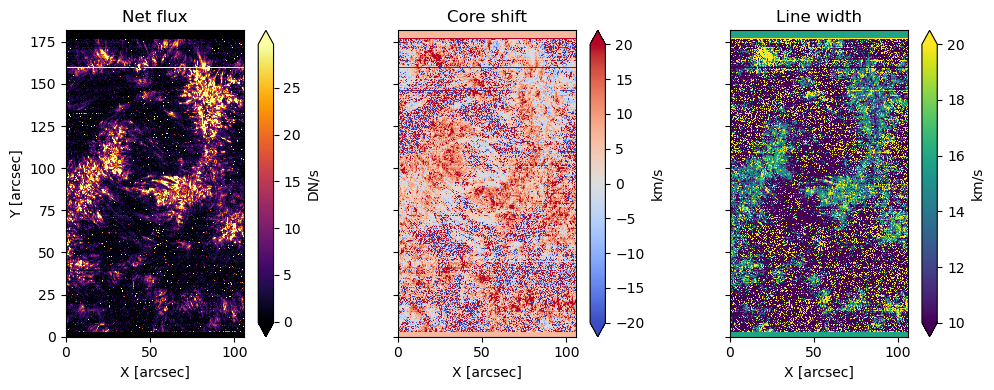

In [11]:
plt.style.use('default')
fig, ax = plt.subplots(1,3, figsize=(10.5,4),sharex=True,sharey=True)
im=ax[0].imshow(net_flux.T,interpolation='nearest',vmin=np.nanpercentile(net_flux, 1),vmax=np.nanpercentile(net_flux, 97),
           origin='lower',cmap='inferno',extent = [0,320*0.33,0,1095*0.166])
# ax[0].set_title('Bz [G]')
ax[0].set_xlabel('X [arcsec]')
ax[0].set_ylabel('Y [arcsec]')
fig.colorbar(im, ax=ax[0], orientation='vertical',extend='both',label='DN/s')
ax[0].set_title('Net flux')

im = ax[1].imshow(core_shift.T,interpolation='nearest',vmin=-20,vmax=20,
           origin='lower',cmap='coolwarm',extent = [0,320*0.33,0,1095*0.166])
# ax[1].set_title('Bz [G]')
ax[1].set_xlabel('X [arcsec]')
# ax[1].set_ylabel('Y [arcsec]')
fig.colorbar(im, ax=ax[1], orientation='vertical', extend='both',label='km/s')
ax[1].set_title('Core shift')

im = ax[2].imshow(sigma.T,interpolation='nearest',vmin=10,vmax=20,
           origin='lower',cmap='viridis',extent = [0,320*0.33,0,1095*0.166])
# ax[2].set_title('Bz [G]')
ax[2].set_xlabel('X [arcsec]')
# ax[2].set_ylabel('Y [arcsec]')
fig.colorbar(im, ax=ax[2], orientation='vertical', extend='both',label='km/s')
ax[2].set_title('Line width')
fig.tight_layout()
# plt.show()
# plt.savefig('/Users/souvikb/various_analysis/GaussSep/Results/si4_moments.png', dpi=300, bbox_inches='tight')

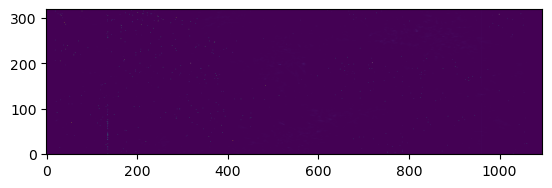

In [16]:
plt.imshow(net_flux,vmin=0,origin='lower')

In [17]:
net_flux.shape

(320, 1095)

(1095, 89)

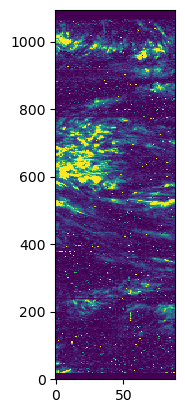

In [46]:
net_flux_selected = net_flux[66:155,:]
plt.imshow(net_flux_selected.T,vmin=0,vmax=25,aspect=0.25,origin='lower',interpolation='none')
net_flux_selected.T.shape

In [37]:
np.round(np.shape(net_flux_selected)[0]*0.388/0.297140), np.round(np.shape(net_flux_selected)[1]*0.1663/0.317)

(116.0, 574.0)

In [63]:
import numpy as np
from scipy.ndimage import zoom  # cubic interpolation: order=3
## Iris resampled to SOT scale
# target sizes implied by new plate scales
nx, ny = net_flux_selected.T.shape  # current (rows, cols) in arcsec map
scale_x = (np.shape(net_flux_selected)[0] * 0.388 / 0.297140) / ny
scale_y = (np.shape(net_flux_selected)[1] * 0.1663 / 0.317) / nx

print(scale_x,scale_y)
net_flux_resampled = zoom(net_flux_selected.T,
                          zoom=(scale_y, scale_x),
                          order=3,
                          mode='nearest')  # pick edge handling to taste

1.3057817863633305 0.5246056782334385


Text(0.5, 1.0, 'resampled & aligned IRIS')

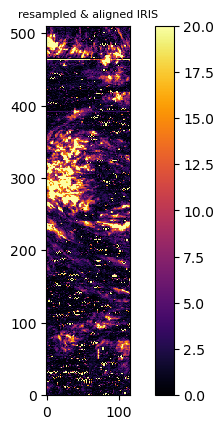

In [61]:
plt.imshow(net_flux_resampled[40:40+511,:],vmin=0,vmax=20,origin='lower',interpolation='none',cmap='inferno')
plt.colorbar()
plt.title('resampled & aligned IRIS', fontsize=8)

In [ ]:
## Shift the SOT SP current density map by the shif that is present in IDL save file. Can use 
## then basically plot the current_density[0:115,:] and compare with IRIS2+, Si IV intensity, non-thermal velocities etc.